<a href="https://colab.research.google.com/github/anioki/ML_training_projects/blob/main/fish/fish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download data

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annaonishchenko","key":"8402689925943b82e029c24ccf02e1bd"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                           title                                              size  lastUpdated          downloadCount  
------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                   Reddit Vaccine Myths                              232KB  2021-06-26 07:50:27           8315  
crowww/a-large-scale-fish-dataset                             A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           5089  
imsparsh/musicnet-dataset                                     MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1730  
promptcloud/careerbuilder-job-listing-2020                    Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52           1162  
coloradokb/dandelionimages                                    Da

In [4]:
! kaggle datasets download -d crowww/a-large-scale-fish-dataset

100% 3.24G/3.24G [00:56<00:00, 22.1MB/s]
100% 3.24G/3.24G [00:56<00:00, 61.9MB/s]


In [5]:
! mkdir data
! unzip a-large-scale-fish-dataset.zip -d data

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: data/Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00447.png  
  inflating: data/Fish

In [6]:
import pandas as pd
import os

In [7]:
dir = '/content/data/Fish_Dataset/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [8]:
df

,path,label
0,/content/data/Fish_Dataset/Fish_Dataset/Black ...,Black Sea Sprat
1,/content/data/Fish_Dataset/Fish_Dataset/Black ...,Black Sea Sprat
2,/content/data/Fish_Dataset/Fish_Dataset/Black ...,Black Sea Sprat
3,/content/data/Fish_Dataset/Fish_Dataset/Black ...,Black Sea Sprat
4,/content/data/Fish_Dataset/Fish_Dataset/Black ...,Black Sea Sprat
...,...,...
8995,/content/data/Fish_Dataset/Fish_Dataset/Gilt-H...,Gilt-Head Bream
8996,/content/data/Fish_Dataset/Fish_Dataset/Gilt-H...,Gilt-Head Bream
8997,/content/data/Fish_Dataset/Fish_Dataset/Gilt-H...,Gilt-Head Bream
8998,/content/data/Fish_Dataset/Fish_Dataset/Gilt-H...,Gilt-Head Bream


#Data Preprocessing

In [9]:
df['label']=df['label'].astype('category')

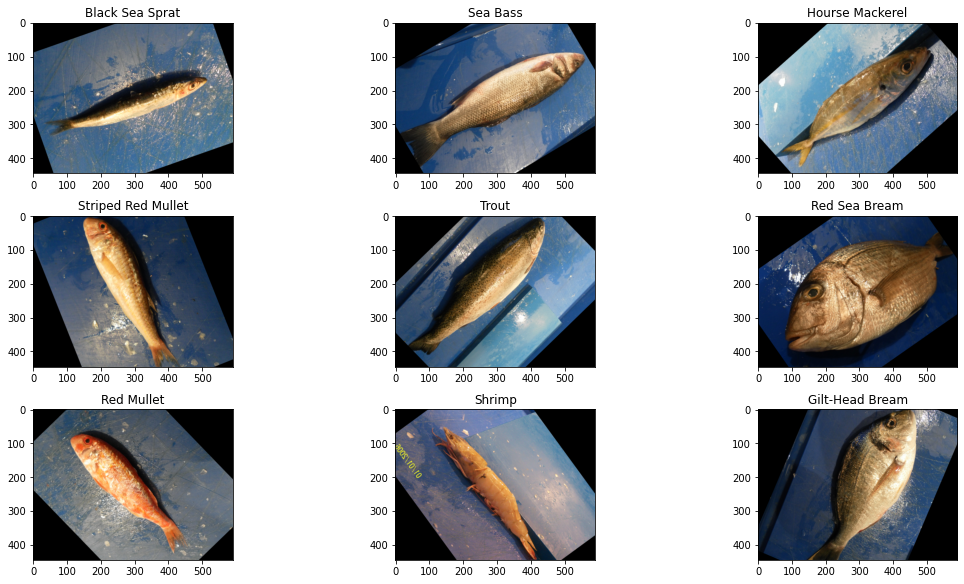

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['label'].unique():
    
    ax[j].imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

In [11]:
class_names = df['label'].unique()
plt.imread(df['path'][1]).shape

(445, 590, 3)

In [12]:
from sklearn.model_selection import train_test_split
Train_set, test_set = train_test_split(df, test_size = 0.3, random_state = 42)
train_set, val_set = train_test_split(Train_set, test_size= 0.2, random_state = 42)

In [13]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import preprocess_input
img_gen = ImageDataGenerator(preprocessing_function = preprocess_input, rescale=1/255)
img_size=(224, 224)
# img_gen cannot take in an array, so ensure the data that is been passed is a dataframe
train = img_gen.flow_from_dataframe(dataframe = train_set,
    x_col = 'path', 
    y_col ='label', 
    target_size = (224, 224),
    color_mode = 'rgb',
    class_mode = 'categorical',#the class mode here and that for the model_loss(when using sequential model)
                                    #should be the same
    batch_size = 32,
    shuffle = False 
)

test = img_gen.flow_from_dataframe(dataframe = test_set,
    x_col = 'path', 
    y_col ='label', 
    target_size =(224, 224),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False 
)


val = img_gen.flow_from_dataframe(dataframe = val_set,
    x_col = 'path', 
    y_col ='label', 
    target_size =(224, 224),
    color_mode ='rgb',
    class_mode ='categorical',
    batch_size = 32,
    shuffle = False 
)

Found 5040 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.


In [14]:
image_shape=test[0][0].shape[1:]
image_shape

(224, 224, 3)

In [15]:
test.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

#Model

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape = image_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(rate = 0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(9, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 394272)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               50466944  
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 5

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

results = model.fit(train, epochs=6, validation_data=val, verbose = 1)

Epoch 1/6
158/158 [==============================] - 92s 381ms/step - loss: 2.1093 - accuracy: 0.4232 - val_loss: 0.7672 - val_accuracy: 0.7968
Epoch 2/6
158/158 [==============================] - 59s 371ms/step - loss: 0.6412 - accuracy: 0.7812 - val_loss: 0.2524 - val_accuracy: 0.9325
Epoch 3/6
158/158 [==============================] - 58s 368ms/step - loss: 0.3054 - accuracy: 0.8952 - val_loss: 0.1261 - val_accuracy: 0.9619
Epoch 4/6
158/158 [==============================] - 58s 369ms/step - loss: 0.1956 - accuracy: 0.9335 - val_loss: 0.1048 - val_accuracy: 0.9659
Epoch 5/6
158/158 [==============================] - 58s 367ms/step - loss: 0.1420 - accuracy: 0.9496 - val_loss: 0.0815 - val_accuracy: 0.9738
Epoch 6/6
158/158 [==============================] - 58s 368ms/step - loss: 0.1245 - accuracy: 0.9569 - val_loss: 0.0835 - val_accuracy: 0.9706


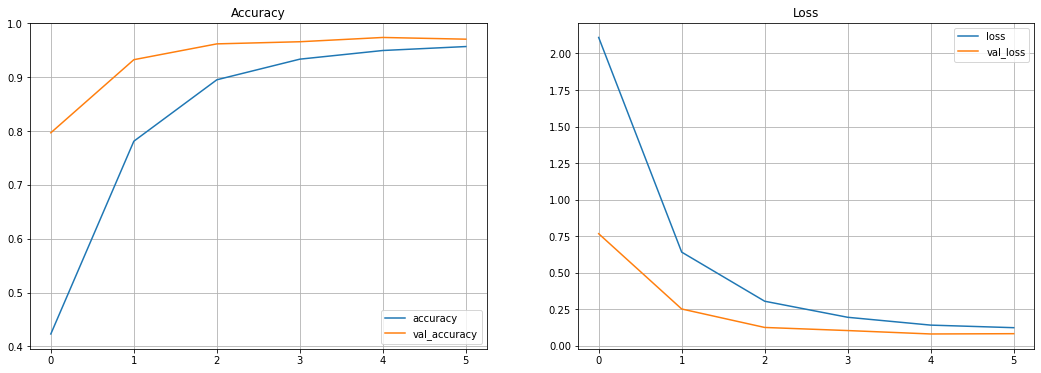

In [19]:
result=pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result['accuracy'], label='accuracy')
ax[0].plot(result['val_accuracy'], label='val_accuracy')
ax[0].set_title("Accuracy")
ax[0].legend(loc='lower right')
ax[0].grid()

ax[1].plot(result['loss'], label='loss')
ax[1].plot(result['val_loss'], label='val_loss')
ax[1].set_title("Loss")
ax[1].legend(loc='upper right')
ax[1].grid()

#Predict

In [20]:
import numpy as np

pred = model.predict(test)


In [21]:
pred = np.argmax(pred,axis = 1)
labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]
from sklearn.metrics import classification_report, confusion_matrix # import metrics for evaluation

y_test = test_set.label # set y_test to the expected output

print(classification_report(y_test, pred2)) # print the classification report

                    precision    recall  f1-score   support

   Black Sea Sprat       0.97      0.98      0.98       300
   Gilt-Head Bream       1.00      0.89      0.94       294
   Hourse Mackerel       1.00      0.97      0.98       287
        Red Mullet       0.99      1.00      1.00       314
     Red Sea Bream       1.00      0.99      0.99       298
          Sea Bass       0.99      0.93      0.96       326
            Shrimp       0.99      0.99      0.99       297
Striped Red Mullet       1.00      0.98      0.99       288
             Trout       0.84      1.00      0.91       296

          accuracy                           0.97      2700
         macro avg       0.97      0.97      0.97      2700
      weighted avg       0.97      0.97      0.97      2700



#MNN

In [24]:
from tensorflow import keras
from tensorflow.keras.preprocessing import image
mobile = tf.keras.applications.mobilenet.MobileNet()

In [23]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

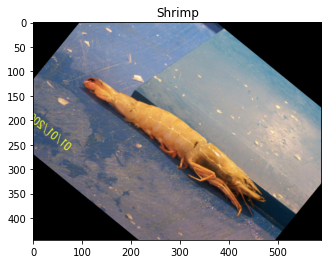

In [91]:
import matplotlib.image as mpimg
n = 7004
img = image.load_img(df['path'][n], target_size=(224, 224))
img_array = image.img_to_array(img)
img_array_expanded_dims = np.expand_dims(img_array, axis=0)
img_mobile = tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

img = mpimg.imread(df['path'][n])
plt.imshow(img)
plt.title(df['label'][n]);

In [92]:
predictions = mobile.predict(img_mobile)

In [93]:
from tensorflow.keras.applications import imagenet_utils
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01443537', 'goldfish', 0.55252874),
  ('n07860988', 'dough', 0.04411338),
  ('n02536864', 'coho', 0.042850327),
  ('n04270147', 'spatula', 0.038795494),
  ('n03658185', 'letter_opener', 0.034012187)]]